In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv(r"C:\Users\This PC\OneDrive\OneDrive - Islamabad Model Postgraduate College of Commerce H-8 4 Islamabad\SZABIST WORKING ZONE\SZABIST WORKING S 4\DATASETS\credit_risk_dataset.csv")

In [5]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [13]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [17]:
df.duplicated().sum()

165

In [21]:
df=df.dropna()

In [35]:
df=df.drop_duplicates()

In [37]:
df.shape

(28501, 12)

In [39]:
df.duplicated().sum()

0

In [43]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

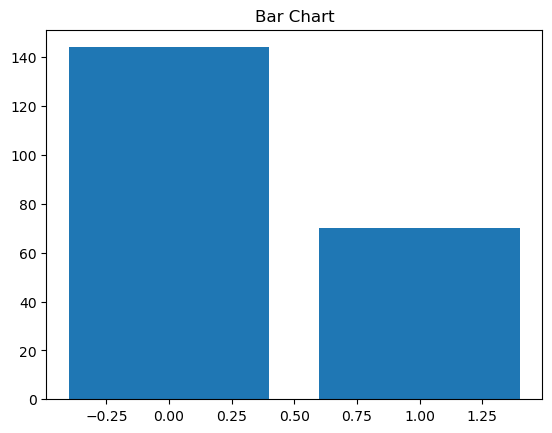

In [77]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [85]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [106]:
df['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [81]:
# Map categories to numbers
df['person_home_ownership'] = df['person_home_ownership'].map({'RENT': 1, 'OWN': 2,'MORTGAGE':3,'OTHER':4})

In [87]:
# Map categories to numbers
df['loan_intent'] = df['loan_intent'].map({'PERSONAL': 1, 'EDUCATION': 2,'MEDICAL':3,'VENTURE':4,'HOMEIMPROVEMENT':5,'DEBTCONSOLIDATION':6,})

In [108]:
# Map categories to numbers
df['loan_grade'] = df['loan_grade'].map({'A': 1, 'B': 2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [112]:
# Map categories to numbers
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0,})

In [114]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,1,123.0,1,4,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,2,2,1000,11.14,0,0.10,0,2
2,25,9600,3,1.0,3,3,5500,12.87,1,0.57,0,3
3,23,65500,1,4.0,3,3,35000,15.23,1,0.53,0,2
4,24,54400,1,8.0,3,3,35000,14.27,1,0.55,1,4


In [116]:
from sklearn.model_selection import train_test_split

In [137]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [139]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [142]:
x = df.drop('cb_person_default_on_file', axis=1)
y=df['cb_person_default_on_file']

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [146]:
model=DecisionTreeClassifier(random_state=42)

In [148]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [156]:
ypred=model.predict(x_test)

In [158]:
ypred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [162]:
print("Accuracy:", accuracy_score(y_test, ypred))
print("\nClassification Report:\n", classification_report(y_test, ypred))

Accuracy: 0.8230135064023856

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      4646
           1       0.52      0.50      0.51      1055

    accuracy                           0.82      5701
   macro avg       0.71      0.70      0.70      5701
weighted avg       0.82      0.82      0.82      5701



In [168]:
import seaborn as sns

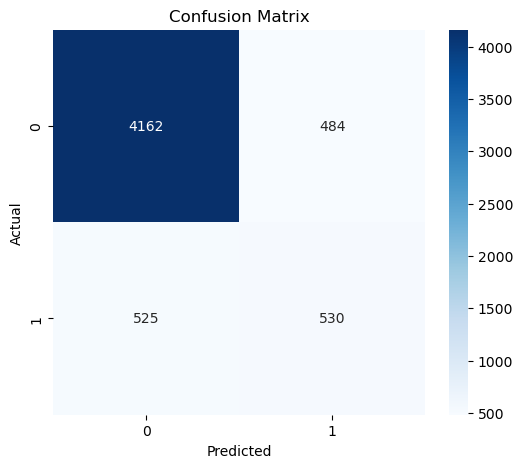

In [171]:
cm = confusion_matrix(y_test, ypred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [187]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [191]:

# Predict
y_pred = rf.predict(x_test)


In [193]:

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.824065953341519

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      4646
           1       0.53      0.49      0.51      1055

    accuracy                           0.82      5701
   macro avg       0.71      0.70      0.70      5701
weighted avg       0.82      0.82      0.82      5701

